
## =================================================

## Model Inference Graded Challenge 7

## Nama  : Ranie Sita Mannuela
## Batch : RMT-030

### Objective:
#### Tujuan dari program ini adalah untuk mengembangkan model computer vision menggunakan Arrtificial Neural Networks(ANN) untuk mengklasifikasikan gambar kanker kulit. Model ini diharapkan dapat membedakan berbagai jenis lesi kulit dengan akurasi yang baik. Proses melibatkan beberapa tahap penting, termasuk pemuatan dan pra-pemrosesan data, analisis data eksploratif, rekayasa fitur (seperti augmentasi data), serta pelatihan dan evaluasi model ANN
## =================================================

# 1 - Import Libraries

In [7]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# 2 - Load model




In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!cp "/content/drive/My Drive/Hacktiv8/fine_tuned_vgg16_model.h5" /content/


In [9]:
model_path = '/content/fine_tuned_vgg16_model.h5'
fine_tuned_vgg16_model = tf.keras.models.load_model(model_path)

# 3 - Predict




In [12]:
from google.colab import files
uploaded = files.upload()


Saving images.jpeg to images.jpeg


1/1 [==============================] - 0s 245ms/step
Predicted Class: melanoma, Confidence: 0.55


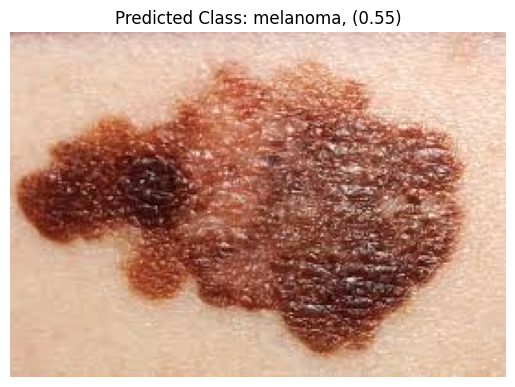

In [21]:
img_path = 'images.jpeg'

from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt


class_names = ['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']

# Load and Preprrocess Image
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array

# Predictions
def make_prediction(img_path):
    img_array = load_and_preprocess_image(img_path)
    predictions = fine_tuned_vgg16_model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions)]
    confidence = np.max(predictions)
    return predicted_class, confidence

# Test function with image
predicted_class, confidence = make_prediction(img_path)
print(f"Predicted Class: {predicted_class}, Confidence: {confidence:.2f}")

# Visualize image
plt.imshow(image.load_img(img_path))
plt.title(f"Predicted Class: {predicted_class}, ({confidence:.2f})")
plt.axis('off')
plt.show()
